# Project: Wrangling and Analyze Data

In [2]:
#Importing relevant libraries

import pandas as pd
import requests
import json
import wordcloud
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [3]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [4]:
#Reading downloaded twitter archive file.

twitter_df = pd.read_csv('twitter-archive-enhanced-2.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [ ]:
#Downloading image file programmatically


url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save HTML to file

with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [5]:
# Reading saved TSV flat file
image_df = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
#Reading Twitter JSON File.  Unable to get twitter developer access

tweet_list = []

with open ('tweet-json.txt', 'r', encoding = 'utf-8') as jsfile:
    for line in jsfile:
        tweet_lines = json.loads(line)
        tweetID = tweet_lines['id']
        retweet_count = tweet_lines['retweet_count']
        friends_count = tweet_lines['user']['friends_count']
        fav_count = tweet_lines['favorite_count']
        followers_count = tweet_lines['user']['followers_count']
        listed_count = tweet_lines['user']['listed_count']
        
        
        tweet_list.append({ 'tweet_id': tweetID,
                            'retweet_count': retweet_count,
                            'friends_count': friends_count,
                            'favorite_count': fav_count,
                            'followers_count': followers_count,
                            'listed_count': listed_count })
    






In [7]:
#Converting tweet list of dictionary to table

tweet_json_data = pd.DataFrame(tweet_list, columns=['tweet_id','retweet_count','friends_count', 'favorite_count', 'followers_count', 'listed_count'])

In [8]:
#making copies of gathered data

twitter_archive_data = twitter_df.copy()
image_data = image_df.copy()
Json_data = tweet_json_data.copy()



result = pd.concat(frames)    892420643555336000 891327558926688000
892420643555336193 891327558926688 891087950875897
                   891327558926688256

## Assessing Data


#### Visual Assessment

In [9]:
#Visualizing twitter archive data 

twitter_archive_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336000,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343000,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084000,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858000,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688000,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822000,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800000,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032000,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620000,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [10]:
#Visualizing image archive data 


image_data

 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [11]:
#Visualizing Json archive data 

Json_data
 

,tweet_id,retweet_count,friends_count,favorite_count,followers_count,listed_count
0,892420643555336193,8853,104,39467,3200889,2784
1,892177421306343426,6514,104,33819,3200889,2784
2,891815181378084864,4328,104,25461,3200889,2784
3,891689557279858688,8964,104,42908,3200889,2784
4,891327558926688256,9774,104,41048,3200889,2784
...,...,...,...,...,...,...
2349,666049248165822465,41,104,111,3201018,2812
2350,666044226329800704,147,104,311,3201018,2812
2351,666033412701032449,47,104,128,3201018,2812
2352,666029285002620928,48,104,132,3201018,2812


###### Programmatic Assessment



In [12]:
twitter_archive_data.sample(10)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
404,824025158776213000,NaN,NaN,2017-01-24 22:44:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""I wish we were dogs"" 14/10 for @BadlandsNPS h...",NaN,NaN,NaN,https://twitter.com/badlandsnps/status/8239662...,14,10,None,None,None,None,None
1106,734787690684657000,NaN,NaN,2016-05-23 16:46:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog is more successful than I will ever b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/734787690...,13,10,None,None,None,None,None
1415,698703483621523000,NaN,NaN,2016-02-14 03:01:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rusty. He has no respect for POULTRY p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698703483...,7,10,Rusty,None,None,None,None
497,813142292504645000,NaN,NaN,2016-12-25 22:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Everybody stop what you're doing and look at t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813142292...,13,10,None,None,None,None,None
2270,667502640335572000,NaN,NaN,2015-11-20 00:40:05 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Say hello to Hall and Oates. Oates is winking ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667502640...,11,10,Hall,None,None,None,None
2002,672481316919734000,NaN,NaN,2015-12-03 18:23:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Jazz. She should be on the cover ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672481316...,12,10,Jazz,None,None,pupper,None
763,778027034220126000,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1002,747885874273214000,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
587,799757965289017000,NaN,NaN,2016-11-18 23:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sobe. She's a h*ckin happy doggo. Only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/799757965...,13,10,Sobe,doggo,None,None,None
1577,687399393394311000,NaN,NaN,2016-01-13 22:22:41 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Barry. He's very fast. I hope he finds...,NaN,NaN,NaN,https://vine.co/v/iM2hLu9LU5i,10,10,Barry,None,None,None,None


In [13]:
twitter_archive_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582495e+16,1.252797e+17,6.236930e+16,9.599252e+16,45.876648,6.745237
min,6.660209e+17,6.658150e+17,1.185634e+07,6.661040e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757418e+17,3.086374e+08,7.186310e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038710e+17,4.196984e+09,7.804660e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257800e+17,4.196984e+09,8.203150e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862660e+17,8.405480e+17,8.874740e+17,7.874620e+17,1776.000000,170.000000


In [14]:
twitter_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
image_data.sample(10)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
125,668248472370458624,https://pbs.twimg.com/media/CUYYcMfXAAAixe7.jpg,1,Chihuahua,0.734547,True,miniature_pinscher,0.068294,True,toy_terrier,0.046367,True
1758,825535076884762624,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,1,Rottweiler,0.681495,True,Tibetan_mastiff,0.147940,True,black-and-tan_coonhound,0.024525,True
1034,711732680602345472,https://pbs.twimg.com/media/CeCVGEbUYAASeY4.jpg,3,dingo,0.366875,False,Ibizan_hound,0.334929,True,Eskimo_dog,0.073876,True
1325,756998049151549440,https://pbs.twimg.com/media/CoFlsGAWgAA2YeV.jpg,4,golden_retriever,0.678555,True,Labrador_retriever,0.072632,True,Border_terrier,0.049033,True
1594,798697898615730177,https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg,1,Labrador_retriever,0.868671,True,carton,0.095095,False,pug,0.007651,True
1178,737826014890496000,https://pbs.twimg.com/media/Cj1I1fbWYAAOwff.jpg,1,vizsla,0.990391,True,Rhodesian_ridgeback,0.005605,True,Chesapeake_Bay_retriever,0.002869,True
313,671561002136281088,https://pbs.twimg.com/media/CVHdK-7WwAAsuyc.jpg,1,Gordon_setter,0.469373,True,black-and-tan_coonhound,0.270893,True,Rottweiler,0.153233,True
195,669583744538451968,https://pbs.twimg.com/media/CUrW3DWXIAAiRqk.jpg,1,candle,0.174315,False,lampshade,0.120407,False,plunger,0.072099,False
1665,812503143955202048,https://pbs.twimg.com/media/C0aXTLqXEAADxBi.jpg,2,loupe,0.546856,False,web_site,0.345298,False,bubble,0.010528,False
288,671159727754231808,https://pbs.twimg.com/media/CVBwNjVWwAAlUFQ.jpg,1,pitcher,0.117446,False,sunglasses,0.062487,False,mask,0.059517,False


In [16]:
image_data.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
image_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
Json_data.sample(10)

,tweet_id,retweet_count,friends_count,favorite_count,followers_count,listed_count
1905,674447403907457024,393,104,1137,3201003,2812
1065,740676976021798912,7724,104,19881,3200851,2843
32,885984800019947520,7097,104,33382,3200890,2784
1040,743895849529389061,1087,104,3999,3200943,2802
1438,696886256886657024,2016,104,5317,3200950,2803
743,780192070812196864,2589,104,9712,3200901,2789
741,780476555013349377,136,104,0,3200901,2789
275,840632337062862849,1972,104,9761,3200891,2786
853,764857477905154048,2029,104,7099,3200907,2789
729,781661882474196992,3129,104,11634,3200901,2789


In [19]:
Json_data.describe()
  

,tweet_id,retweet_count,friends_count,favorite_count,followers_count,listed_count
count,2.354000e+03,2354.000000,2354.0,2354.000000,2.354000e+03,2354.000000
mean,7.426978e+17,3164.797366,104.0,8080.968564,3.200942e+06,2799.480884
std,6.852812e+16,5284.770364,0.0,11814.771334,4.457302e+01,11.178223
min,6.660209e+17,0.000000,104.0,0.000000,3.200799e+06,2724.000000
25%,6.783975e+17,624.500000,104.0,1415.000000,3.200898e+06,2788.000000
50%,7.194596e+17,1473.500000,104.0,3603.500000,3.200945e+06,2803.000000
75%,7.993058e+17,3652.000000,104.0,10122.250000,3.200953e+06,2805.000000
max,8.924206e+17,79515.000000,104.0,132810.000000,3.201018e+06,2846.000000


In [20]:
Json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   retweet_count    2354 non-null   int64
 2   friends_count    2354 non-null   int64
 3   favorite_count   2354 non-null   int64
 4   followers_count  2354 non-null   int64
 5   listed_count     2354 non-null   int64
dtypes: int64(6)
memory usage: 110.5 KB


In [21]:
twitter_archive_data.shape

(2356, 17)

In [22]:
image_data.shape


(2075, 12)

In [23]:
Json_data.shape

(2354, 6)

### Quality issues

###### Twitter archive table
1. Missing data in 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp' columns

2. Content not original tweets in 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp' columns

3. Some values in name column does not look like name of a noun

4. Text containing "We only rate dogs" and "I only rate dogs" suggest rating is not for a dog

5. Some text description indicates retweeted text and not original tweets

6. timestamp column is object type instead of datetime            

7. denominator column has value more than 10

8. Missing rows in expanded_urls columns


### Tidiness issues

###### Image data table
1. Unclear column names of p1, p1_conf, p1_dog, p2	p2_conf, p2_dog, p3, p3_conf, p3_dog

###### Tweet archive data table

2. Unpivot the dogs stage columns (doggo, floofer, pupper, puppo)

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [24]:
# Make copies of original pieces of data

twitter_archive_data2 = twitter_df.copy()
image_data2 = image_df.copy()
Json_data2 = tweet_json_data.copy()

### Issues one

#### Define:  Table contained retweeted data

Remove rows with these data 

#### Code

In [25]:
twitter_archive_data2.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [26]:
twitter_archive_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [27]:
twitter_archive_data2.drop(twitter_archive_data2[twitter_archive_data2['retweeted_status_id'] > 0].index, inplace=True)

#### Test

In [28]:
twitter_archive_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [29]:
twitter_archive_data2.shape

(2175, 17)

### Issue #2:

#### Define : Table contained replied tweets.

Remove all replied tweets

#### Code

In [30]:
twitter_archive_data2.drop(twitter_archive_data2[twitter_archive_data2['in_reply_to_status_id'] > 0].index, inplace=True)

#### Test

In [31]:
twitter_archive_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [32]:
twitter_archive_data2.shape

(2097, 17)

### Issue #3:

#### Define : Tweet archive contained columns with no values.

Remove all columns with no values.

Removing in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' columns

#### Code

In [33]:
twitter_archive_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [34]:
twitter_archive_data2.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'], axis = 1, inplace=True)

### Test

In [35]:
twitter_archive_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Issue 4

### Define

timestamp column in twitter archive table is object type instead of datetime

### code

In [36]:
# Code to convert timestamp from object to datetime
twitter_archive_data2.timestamp = pd.to_datetime(twitter_archive_data2.timestamp)

### test

In [37]:
twitter_archive_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Issue 5

#### Define

Replace none to nan in dog stages column to aid these columns restructuring in twitter archive table

#### Code

In [38]:
twitter_archive_data2['doggo'] = twitter_archive_data2['doggo'].replace('None', "")

In [39]:
twitter_archive_data2['floofer'] = twitter_archive_data2['floofer'].replace('None', "")

In [40]:
twitter_archive_data2['pupper'] = twitter_archive_data2['pupper'].replace('None', "")

In [41]:
twitter_archive_data2['puppo'] = twitter_archive_data2['puppo'].replace('None', "")

#### Test

In [42]:
twitter_archive_data2['doggo'].unique()

array(['', 'doggo'], dtype=object)

In [43]:
twitter_archive_data2['floofer'].unique()

array(['', 'floofer'], dtype=object)

In [44]:
twitter_archive_data2['pupper'].unique()

array(['', 'pupper'], dtype=object)

In [45]:
twitter_archive_data2['puppo'].unique()

array(['', 'puppo'], dtype=object)

In [46]:
twitter_archive_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

In [47]:
twitter_archive_data2['text'][1165]

'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a'

### Issue 6

#### Define

Some numerator and denominator ratings are not correct. Based on details in text column.

Extracting the ratings for both numerator and denominator

#### Code

In [48]:
import re

###### Regex selection

In [49]:
regex = r"(\d+)/(\d+)"

###### Rating numerator change

In [50]:
def rating_numerator(data):
    match_findall = re.findall(regex, data)
    if len(match_findall) > 1:
        return(match_findall[-1][0])
    else:
        return(match_findall[0][0])
    


In [51]:
twitter_archive_data2['rating_numerator2'] = twitter_archive_data2['text'].apply(rating_numerator).astype('int64')

###### Rating denominator change

In [52]:
def rating_denominator(data):
    match_findall = re.findall(regex, data)
    if len(match_findall) > 1:
        return(match_findall[-1][1])
    else:
        return(match_findall[0][1])
    


In [53]:
twitter_archive_data2['rating_denominator2'] = twitter_archive_data2['text'].apply(rating_denominator).astype('int64')

#### Test

In [54]:
twitter_archive_data2[twitter_archive_data2['rating_denominator'] > 10].head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating_numerator2,rating_denominator2
433,820690176645140000,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,,,,,84,70
902,758467244762497000,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,,,,,165,150
1068,740373189193256000,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,,,,,14,10
1120,731156023742988000,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,,,,,204,170
1165,722974582966214000,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,,,,,13,10


In [55]:
match = re.search(regex, twitter_archive_data2['text'][1165])

In [56]:
print(match)

<re.Match object; span=(6, 10), match='4/20'>


In [57]:
match_findall = re.findall(regex, twitter_archive_data2['text'][1165])

In [58]:
match_findall

[('4', '20'), ('13', '10')]

In [59]:
twitter_archive_data2.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'rating_numerator2', 'rating_denominator2'],
      dtype='object')

### issue 7 

##### Define 
Wrong named dogs. Stop words used as dog names

##### Code

In [60]:
wrong_name_set = set()

In [61]:
#All stop words begins with small letters
for name in twitter_archive_data2['name']:
    if name[0].islower():
        wrong_name_set.add(name)


In [62]:
wrong_name_set

{'a',
 'actually',
 'all',
 'an',
 'by',
 'getting',
 'his',
 'incredibly',
 'infuriating',
 'just',
 'life',
 'light',
 'mad',
 'my',
 'not',
 'officially',
 'old',
 'one',
 'quite',
 'space',
 'such',
 'the',
 'this',
 'unacceptable',
 'very'}

In [63]:
wrong_name_list = list((wrong_name_set)) + ['None']

In [64]:
wrong_name_list

['infuriating',
 'an',
 'very',
 'old',
 'by',
 'mad',
 'actually',
 'one',
 'unacceptable',
 'a',
 'all',
 'the',
 'quite',
 'this',
 'life',
 'getting',
 'just',
 'officially',
 'such',
 'incredibly',
 'space',
 'not',
 'his',
 'light',
 'my',
 'None']

In [65]:
#Replacing the stop words with No name


twitter_archive_data2['name'].replace(wrong_name_list, "No name", inplace=True)

##### Test

In [66]:
twitter_archive_data2['name'].value_counts()

No name       707
Lucy           11
Charlie        11
Oliver         10
Cooper         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 930, dtype: int64

In [67]:
twitter_archive_data2['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'No name',
       'Jax', 'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart',
       'Oliver', 'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hob

###### name

testing = twitter_archive_data2['text'][2326]
print(testing)

regex_name2 = r"(Tt?his is|Meet)\s(\w{1,20})"

match_find_name2 = re.findall(regex_name2, testing)

print(match_find_name2)

### Issue 8

##### Define

Inconsisted capitalization of p1, p2, p3

Data in the p1, p2 and p3 columns of image_data2 data have some first letter capitalized while some are not.

##### Code

In [68]:
image_data2['p1'] = image_data2['p1'].str.capitalize()

In [69]:
image_data2['p2'] = image_data2['p2'].str.capitalize()

In [70]:
image_data2['p3'] = image_data2['p3'].str.capitalize()

##### Test

In [71]:
image_data2.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_swiss_mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box_turtle,0.933012,False,Mud_turtle,0.045885,False,Terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan_mastiff,0.058279,True,Fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping_cart,0.962465,False,Shopping_basket,0.014594,False,Golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature_poodle,0.201493,True,Komondor,0.192305,True,Soft-coated_wheaten_terrier,0.082086,True


In [72]:
image_data2['p1'].value_counts()

Golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
Pug                    57
                     ... 
Pillow                  1
Carousel                1
Bald_eagle              1
Lorikeet                1
Orange                  1
Name: p1, Length: 378, dtype: int64

### Issue 9

tweet_id columns in all tables is int

##### Define

Convert tweet_id to string datatype in all datatypes

##### Code

In [73]:
twitter_archive_data2.tweet_id = twitter_archive_data2.tweet_id.astype(str)
image_data2.tweet_id = image_data2.tweet_id.astype(str)
Json_data2.tweet_id = Json_data2.tweet_id.astype(str)

In [74]:
##### Test

In [75]:
twitter_archive_data2.tweet_id.dtype

dtype('O')

In [76]:
image_data2.tweet_id.dtype

dtype('O')

In [77]:
Json_data2.tweet_id.dtype

dtype('O')

### Tidiness issue

#### Issue 1

###### Define
 
Merging dog_stage name to one column

##### Code

twitter_archive_data2 = twitter_df.copy()
image_data2 = image_df.copy()
Json_data2 = tweet_json_data.copy()

In [78]:
twitter_archive_data2.shape

(2097, 14)

In [79]:
twitter_archive_data2.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'rating_numerator2', 'rating_denominator2'],
      dtype='object')

twitter_archive_data_staged = twitter_archive_data2.melt(id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name','rating_numerator2', 'rating_denominator2'], value_vars=['doggo','floofer','pupper','puppo'], var_name='dog_stage', value_name='dog_stage_name')

In [80]:
### unbunduling the dog stage colums using concantenation method

twitter_archive_data2['dog_stage'] = twitter_archive_data2['doggo'] + twitter_archive_data2['floofer'] + twitter_archive_data2['pupper'] + twitter_archive_data2['puppo'] 

In [81]:
twitter_archive_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   tweet_id             2097 non-null   object             
 1   timestamp            2097 non-null   datetime64[ns, UTC]
 2   source               2097 non-null   object             
 3   text                 2097 non-null   object             
 4   expanded_urls        2094 non-null   object             
 5   rating_numerator     2097 non-null   int64              
 6   rating_denominator   2097 non-null   int64              
 7   name                 2097 non-null   object             
 8   doggo                2097 non-null   object             
 9   floofer              2097 non-null   object             
 10  pupper               2097 non-null   object             
 11  puppo                2097 non-null   object             
 12  rating_numerator2   

In [82]:
twitter_archive_data2['dog_stage'].value_counts()

                1761
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [83]:
#Making dog stage readable

twitter_archive_data2.dog_stage.replace('doggopupper', 'doggo, pupper', inplace=True)

twitter_archive_data2.dog_stage.replace('doggopuppo', 'doggo, puppo', inplace=True)

twitter_archive_data2.dog_stage.replace('doggofloofer', 'doggo, floofer', inplace=True)

twitter_archive_data2.dog_stage.replace('', 'None', inplace=True)



##### Test

In [84]:
twitter_archive_data2['dog_stage'].value_counts()

None              1761
pupper             221
doggo               72
puppo               23
floofer              9
doggo, pupper        9
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

In [85]:
twitter_archive_data2.columns


Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'rating_numerator2', 'rating_denominator2',
       'dog_stage'],
      dtype='object')

In [86]:
#dropping dog stage values used as columns
twitter_archive_data2.drop(['doggo', 'floofer', 'pupper', 'puppo','rating_numerator', 'rating_denominator'], axis=1, inplace=True)

#### Issue 2

###### Define


Rename columns in image_data2 to be more descriptive and clear

##### code

In [87]:
image_data2.rename(columns = {'p1':'img_predicton1', 'p1_conf':'img_prediction1_conf', 'p1_dog':'img_prediction1_isbreed' }, inplace = True)


In [88]:
image_data2.rename(columns = {'p2':'img_predicton2', 'p2_conf':'img_prediction2_conf', 'p2_dog':'img_prediction2_isbreed' }, inplace = True)


In [89]:
image_data2.rename(columns = {'p3':'img_predicton3', 'p3_conf':'img_prediction3_conf', 'p3_dog':'img_prediction3_isbreed' }, inplace = True)


##### Test

In [90]:
image_data2.head()

,tweet_id,jpg_url,img_num,img_predicton1,img_prediction1_conf,img_prediction1_isbreed,img_predicton2,img_prediction2_conf,img_prediction2_isbreed,img_predicton3,img_prediction3_conf,img_prediction3_isbreed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [91]:
image_data2.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'img_predicton1',
       'img_prediction1_conf', 'img_prediction1_isbreed', 'img_predicton2',
       'img_prediction2_conf', 'img_prediction2_isbreed', 'img_predicton3',
       'img_prediction3_conf', 'img_prediction3_isbreed'],
      dtype='object')

In [92]:
twitter_archive_data2.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'name',
       'rating_numerator2', 'rating_denominator2', 'dog_stage'],
      dtype='object')

#### issue 3

tweet_id floating-point rounding issue.

Link: https://stackoverflow.com/questions/66801873/why-is-my-individual-tweet-id-number-changing-last-few-digits-to-0-when-receiv

##### Define

In practice, JSON numbers are often parsed into IEEE 754 double-precision floating-point values; when a value is encountered that cannot be represented exactly by that number format, the number is usually rounded to the nearest representable value.

This made merging on tweet_id difficult.

Removing the last three digit on tweet_id


##### Code

In [93]:
twitter_archive_data2['tweet_id'] = twitter_archive_data2['tweet_id'].apply(lambda x: x[0:-3])
image_data2['tweet_id'] = image_data2['tweet_id'].apply(lambda x: x[0:-3])
Json_data2['tweet_id'] = Json_data2['tweet_id'].apply(lambda x: x[0:-3])

##### Test

In [94]:
len(twitter_archive_data2['tweet_id'][1])

15

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

twitter_archive_data2

image_data2 

Json_data2 

In [95]:
#Reset indexes of dataframes



twitter_archive_data2 = twitter_archive_data2.reset_index(drop=True)
image_data2 = image_data2.reset_index(drop=True)
Json_data2 = Json_data2.reset_index(drop=True)

In [96]:
twitter_archive_data2.shape

(2097, 9)

In [97]:
image_data2.shape

(2075, 12)

In [98]:
Json_data2.shape

(2354, 6)

###### merging on similar tweet id

In [99]:
twitter_archive_master = twitter_archive_data2.merge(Json_data2,on='tweet_id').merge(image_data2,on='tweet_id')

In [100]:
twitter_archive_master.shape

(1971, 25)

In [101]:
twitter_archive_master.head(5)

,tweet_id,timestamp,source,text,expanded_urls,name,rating_numerator2,rating_denominator2,dog_stage,retweet_count,...,img_num,img_predicton1,img_prediction1_conf,img_prediction1_isbreed,img_predicton2,img_prediction2_conf,img_prediction2_isbreed,img_predicton3,img_prediction3_conf,img_prediction3_isbreed
0,892420643555336,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,13,10,None,8853,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,13,10,None,6514,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,12,10,None,4328,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,13,10,None,8964,...,1,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,12,10,None,9774,...,2,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


##### Export data to csv

In [102]:


twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

In [103]:
twitter_archive_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'name',
       'rating_numerator2', 'rating_denominator2', 'dog_stage',
       'retweet_count', 'friends_count', 'favorite_count', 'followers_count',
       'listed_count', 'jpg_url', 'img_num', 'img_predicton1',
       'img_prediction1_conf', 'img_prediction1_isbreed', 'img_predicton2',
       'img_prediction2_conf', 'img_prediction2_isbreed', 'img_predicton3',
       'img_prediction3_conf', 'img_prediction3_isbreed'],
      dtype='object')

## Analyzing and Visualizing Data
I produce at least **three (3) insights and one (1) visualization.**

In [104]:
twitter_master_data = pd.read_csv('twitter_archive_master.csv')

In [105]:
twitter_master_data.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'name',
       'rating_numerator2', 'rating_denominator2', 'dog_stage',
       'retweet_count', 'friends_count', 'favorite_count', 'followers_count',
       'listed_count', 'jpg_url', 'img_num', 'img_predicton1',
       'img_prediction1_conf', 'img_prediction1_isbreed', 'img_predicton2',
       'img_prediction2_conf', 'img_prediction2_isbreed', 'img_predicton3',
       'img_prediction3_conf', 'img_prediction3_isbreed'],
      dtype='object')

In [106]:
twitter_master_data.drop(['expanded_urls','friends_count','listed_count'], axis=1, inplace=True)

In [107]:
# Wordcloud of dog names
# Wordcloud of dog breeds on each prediction
# What is the relationship between friends count and followers
# Dog stage with the highest retweet count
# What is the most favorite dog stage
# What is the most frequent dog stage
# What is dog breed with the highest rating on every prediction


### Question(s) for Analysis
>****: To analysis this data, I posed the following questions to understand the relationship between the variables and how they affect each other. While this may not be all inclusive, I believe they provide info to relevant stakeholders seeking to understand relationship between the dog stage, breeds, names to most favorite, retweeted and frequent tweets

> **1**: What is the relationship between retweet count and favorite count?

> **2**: Most retweeted dog stage?

> **3**: What is the most favorite dog stage?

> **4**: What is the most frequent dog stage?

> **5**: Top ten is dog breed with the Numerator highest rating on every prediction

> **6**: Wordcloud of dog names

> **7**: Wordcloud of dog breeds on all the predictions





### Visualization

### Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'tweet_id'}>,
        <AxesSubplot:title={'center':'rating_numerator2'}>,
        <AxesSubplot:title={'center':'rating_denominator2'}>],
       [<AxesSubplot:title={'center':'retweet_count'}>,
        <AxesSubplot:title={'center':'favorite_count'}>,
        <AxesSubplot:title={'center':'followers_count'}>],
       [<AxesSubplot:title={'center':'img_num'}>,
        <AxesSubplot:title={'center':'img_prediction1_conf'}>,
        <AxesSubplot:title={'center':'img_prediction2_conf'}>],
       [<AxesSubplot:title={'center':'img_prediction3_conf'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

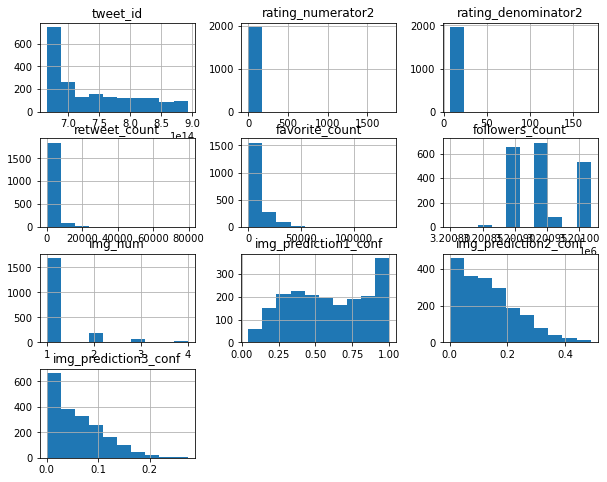

In [108]:
twitter_master_data.hist(figsize=(10,8))

##### Relationship between retweet count and favorite count

In [109]:
twitter_master_data.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'name', 'rating_numerator2',
       'rating_denominator2', 'dog_stage', 'retweet_count', 'favorite_count',
       'followers_count', 'jpg_url', 'img_num', 'img_predicton1',
       'img_prediction1_conf', 'img_prediction1_isbreed', 'img_predicton2',
       'img_prediction2_conf', 'img_prediction2_isbreed', 'img_predicton3',
       'img_prediction3_conf', 'img_prediction3_isbreed'],
      dtype='object')

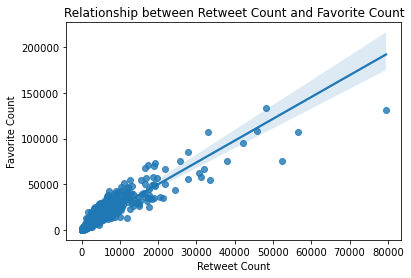

In [111]:
#Does a dog favorite count dependend on the favorite count


sns.regplot(x="retweet_count", y="favorite_count", data=twitter_master_data)
plt.title('Relationship between Retweet Count and Favorite Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.savefig('Retweet_Favorite.png', dpi=100, bbox_inches = 'tight');

##### Most retweeted dog stage 

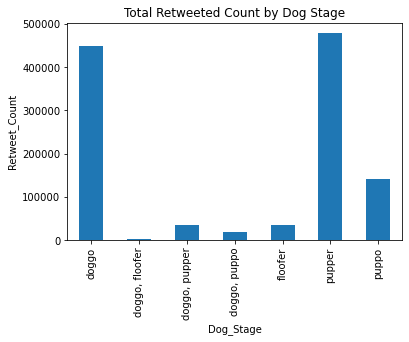

In [112]:
#Total retweeted count by dog stage

twitter_master_data.loc[twitter_master_data["dog_stage"] !="None"].groupby("dog_stage").retweet_count.sum().plot(kind="bar")
plt.title('Total Retweeted Count by Dog Stage')
plt.xlabel('Dog_Stage')
plt.ylabel('Retweet_Count')
plt.savefig('Tot_RtCount_dogstage.png', dpi=150, bbox_inches = 'tight');

In [112]:
# displaying values

twitter_master_data.loc[twitter_master_data["dog_stage"] !="None"].groupby("dog_stage").retweet_count.sum()

dog_stage
doggo             448919
doggo, floofer      3433
doggo, pupper      35178
doggo, puppo       19196
floofer            34781
pupper            478883
puppo             142427
Name: retweet_count, dtype: int64

##### Most liked dog stage 

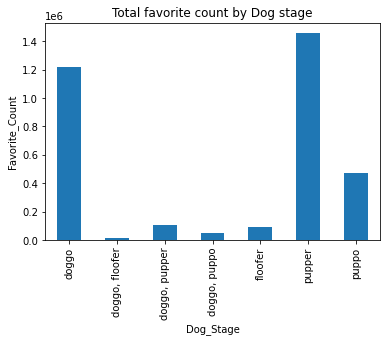

In [113]:
#Most liked dog stage

twitter_master_data.loc[twitter_master_data["dog_stage"] !="None"].groupby("dog_stage").favorite_count.sum().plot(kind="bar")
plt.title('Total favorite count by Dog stage')
plt.xlabel('Dog_Stage')
plt.ylabel('Favorite_Count')
plt.savefig('Tot_FavCount_dogstage.png', dpi=150, bbox_inches = 'tight');

##### most frequent dog stage

In [114]:
# Most frequent dog stage values

twitter_master_data.loc[twitter_master_data["dog_stage"] !="None"].dog_stage.value_counts()

pupper            201
doggo              63
puppo              22
doggo, pupper       8
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

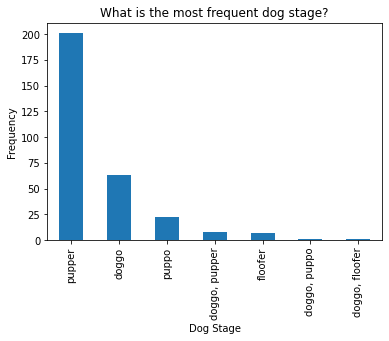

In [129]:
# Visulizng the most frequent dog stage

twitter_master_data.loc[twitter_master_data["dog_stage"] !="None"].dog_stage.value_counts().plot(kind='bar')
plt.title('What is the most frequent dog stage?')
plt.xlabel('Dog Stage')
plt.ylabel('Frequency')
plt.savefig('most_freq_dogstage.png', dpi=100, bbox_inches = 'tight');

##### Top ten is dog breed with the Numerator highest rating on every prediction

In [123]:
#Highest numerator rating of dog breed on the first prediction

In [130]:
Top10_rating_dogbreed = twitter_master_data.groupby(['img_predicton1'])['rating_numerator2'].max().sort_values(ascending=False).head(10)



In [121]:
Top10_rating_dogbreed

img_predicton1
Bow_tie                        1776
Microphone                      420
Lakeside                        204
Labrador_retriever              165
Teddy                           144
Soft-coated_wheaten_terrier     121
Golden_retriever                 99
West_highland_white_terrier      84
Pomeranian                       75
Great_pyrenees                   60
Name: rating_numerator2, dtype: int64

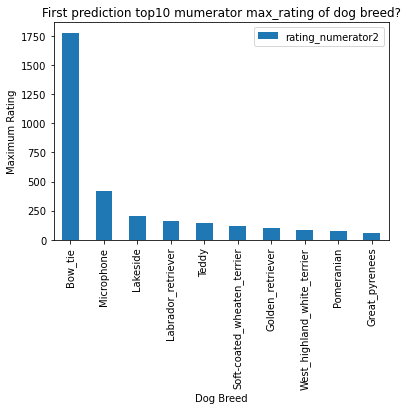

In [131]:
#Visualizing Top_10 breed with the Maximum numerator rating 

Top10_rating_dogbreed.to_frame().plot(kind="bar")
plt.title('First prediction top10 mumerator max_rating of dog breed?')
plt.xlabel('Dog Breed')
plt.ylabel('Maximum Rating')
plt.savefig('Top10_Num_maxrating_dogbreed.png', dpi=100, bbox_inches = 'tight');

In [ ]:
#Highest numerator rating of dog breed on the second prediction

In [132]:
Top10_rating_dogbreed2 = twitter_master_data.groupby(['img_predicton2'])['rating_numerator2'].max().sort_values(ascending=False).head(10)

In [125]:
Top10_rating_dogbreed2

img_predicton2
Sunglasses          1776
Accordion            420
Breakwater           204
Chihuahua            165
Crib                 144
Cocker_spaniel       121
Golden_retriever      88
Kuvasz                84
Dandie_dinmont        80
Persian_cat           75
Name: rating_numerator2, dtype: int64

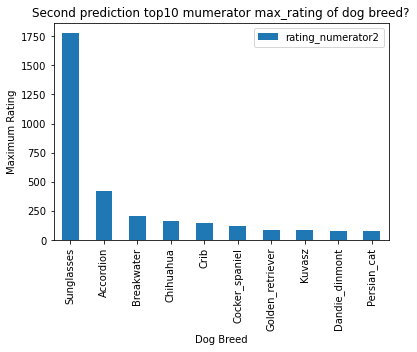

In [133]:
#Visualizing Top_10 breed with the Maximum numerator rating 

Top10_rating_dogbreed2.to_frame().plot(kind="bar")
plt.title('Second prediction top10 mumerator max_rating of dog breed?')
plt.xlabel('Dog Breed')
plt.ylabel('Maximum Rating')
plt.savefig('Top10_Num_maxrating_dogbreed2.png', dpi=100, bbox_inches = 'tight');

In [ ]:
#Highest numerator rating of dog breed on the third prediction

In [134]:
Top10_rating_dogbreed3 = twitter_master_data.groupby(['img_predicton3'])['rating_numerator2'].max().sort_values(ascending=False).head(10)

In [128]:
Top10_rating_dogbreed3

img_predicton3
Sunglass                          1776
Drumstick                          420
King_penguin                       204
American_staffordshire_terrier     165
Chow                               144
Teddy                              121
Irish_setter                        99
Vizsla                              88
Samoyed                             84
Cairn                               80
Name: rating_numerator2, dtype: int64

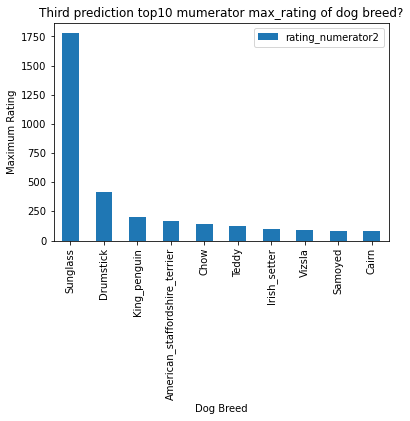

In [135]:
#Visualizing Top_10 breed with the Maximum numerator rating 

Top10_rating_dogbreed3.to_frame().plot(kind="bar")
plt.title('Third prediction top10 mumerator max_rating of dog breed?')
plt.xlabel('Dog Breed')
plt.ylabel('Maximum Rating')
plt.savefig('Top10_Num_maxrating_dogbreed3.png', dpi=100, bbox_inches = 'tight');


##### What is the most popular dog name

In [122]:
#Getting the text

names = " ".join(name for name in twitter_master_data.name)
names

'Phineas Tilly Archie Darla Franklin No name Jax No name Zoey Cassie Koda Bruno No name Ted Stuart Oliver Jim Zeke Ralphus Gerald Jeffrey No name Canela No name No name Maya Mingus Derek Roscoe Waffles Jimbo Maisey No name Earl Lola Kevin No name Yogi Noah Bella Grizzwald No name Rusty Gus Stanley Alfy Koko Rey Gary No name Elliot Louis No name Bella Jesse No name Romeo Bailey Duddles Jack Steven Beau Snoopy Shadow Emmy Aja Penny Dante Nelly Ginger Benedict Venti Goose Nugget No name Cash Jed No name Sebastian No name Sierra No name No name Monkey No name Harry Kody Lassie Rover Napolean Boomer No name Cody Zoey Rumble Clifford Dewey Stanley Scout Gizmo Walter No name Cooper No name Harold Shikha No name Lili Jamesy Coco Boomer Sammy Nelly No name Meatball Paisley Albus Neptune Belle Quinn Zooey Dave Jersey No name Hobbes No name Burt Lorenzo Carl Jordy No name Milky Trooper No name No name No name No name Sophie Wyatt Rosie Thor No name Oscar Zeke Callie Cermet No name No name Marlee 

In [123]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["No name","name"])

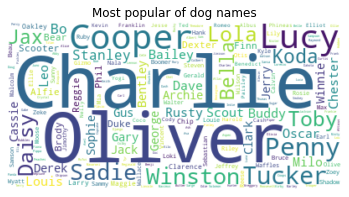

In [125]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(names)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most popular of dog names')
plt.axis("off")
plt.savefig('freq_dognames.png', dpi=100, bbox_inches = 'tight');
plt.show()


##### What is the most popular predicted breed

In [126]:
#Getting breeds in each prediction

total_pred_breed1 = " ".join(breed for breed in twitter_master_data['img_predicton1'])
total_pred_breed2 = " ".join(breed for breed in twitter_master_data['img_predicton2'])
total_pred_breed3 = " ".join(breed for breed in twitter_master_data['img_predicton3'])

In [127]:
#Combining all breeds

total_pred_breed = total_pred_breed1 + total_pred_breed2 + total_pred_breed3
total_pred_breed

"Orange Chihuahua Chihuahua Paper_towel Basset Chesapeake_bay_retriever Appenzeller Pomeranian Irish_terrier Pembroke Samoyed French_bulldog Pembroke French_bulldog Golden_retriever Whippet Golden_retriever Golden_retriever Siberian_husky French_bulldog Basset Limousine Pembroke Mexican_hairless Samoyed Chihuahua Kuvasz Convertible French_bulldog Pug Blenheim_spaniel Pug Malamute Italian_greyhound Chow Pug Pembroke German_shepherd Doberman Golden_retriever Chow Golden_retriever Eskimo_dog Labrador_retriever Pembroke Golden_retriever Web_site Weimaraner Saluki Samoyed Tusker Street_sign Pembroke Golden_retriever Chihuahua Miniature_pinscher Basset German_short-haired_pointer English_springer Tricycle Tabby Vizsla Italian_greyhound Basset French_bulldog Chesapeake_bay_retriever Basset Saluki Pembroke Bloodhound Golden_retriever Bernese_mountain_dog Labrador_retriever Siberian_husky West_highland_white_terrier Labrador_retriever Cocker_spaniel Flat-coated_retriever Cardigan Newfoundland V

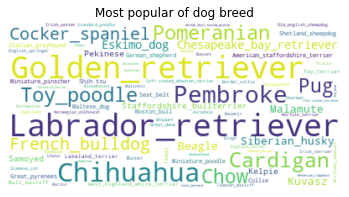

In [128]:
# Generate a word cloud image
wordcloud_breed = WordCloud(background_color="white").generate(total_pred_breed)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_breed, interpolation='bilinear')
plt.title('Most popular of dog breed')
plt.axis("off")
plt.savefig('freq_dog_breeds.png', dpi=150, bbox_inches = 'tight');
plt.show()

### Insights:
1. Charlie is most frequent name given to dogs in the dataset

2. Accross the three different predicted dog breeds, Golden_retriever and Labrador_retriever seems to be the most predicted dog breed

3. Pupper seems to be the most liked dog stage